In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data=pd.read_csv('delhidataset.csv')

In [84]:
print(data.head())

    Area  BHK  Bathroom      Furnishing  \
0  800.0    3       2.0  Semi-Furnished   
1  750.0    2       2.0  Semi-Furnished   
2  950.0    2       2.0       Furnished   
3  600.0    2       2.0  Semi-Furnished   
4  650.0    2       2.0  Semi-Furnished   

                                            Locality  Parking     Price  \
0                                   Rohini Sector 25      1.0   6500000   
1             J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                   Rohini Sector 24      1.0   4200000   
4  Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   

          Status   Transaction           Type  
0  Ready_to_move  New_Property  Builder_Floor  
1  Ready_to_move  New_Property      Apartment  
2  Ready_to_move        Resale      Apartment  
3  Ready_to_move        Resale  Builder_Floor  
4  Ready_to_move  New_Property  Builder_Floor  


In [85]:
data.shape

(1259, 10)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 98.5+ KB


In [87]:
data.isna().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Parking        33
Price           0
Status          0
Transaction     0
Type            5
dtype: int64

In [88]:
data.drop(columns=['Furnishing','Status','Type'],inplace=True)

In [89]:
data.describe()

,Area,BHK,Bathroom,Parking,Price
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08


In [90]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Locality     1259 non-null   object 
 4   Parking      1226 non-null   float64
 5   Price        1259 non-null   int64  
 6   Transaction  1259 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 69.0+ KB


In [91]:
data['Bathroom'].value_counts()

Bathroom
2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: count, dtype: int64

In [92]:
data['Bathroom']=data['Bathroom'].fillna('2.0')

In [93]:
data['Parking'].value_counts()

Parking
1.0      796
2.0      341
3.0       54
4.0       16
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: count, dtype: int64

In [94]:
data['Parking']=data['Parking'].fillna('1.0')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   object 
 3   Locality     1259 non-null   object 
 4   Parking      1259 non-null   object 
 5   Price        1259 non-null   int64  
 6   Transaction  1259 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 69.0+ KB


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X=data[['Area','BHK','Bathroom','Parking']]
Y=data['Price']

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [99]:
X_train

,Area,BHK,Bathroom,Parking
243,4300.0,4,4.0,2.0
514,504.0,3,1.0,1.0
966,1000.0,3,2.0,2.0
199,1295.0,3,2.0,1.0
270,2650.0,4,4.0,2.0
...,...,...,...,...
1044,1200.0,3,2.0,1.0
1095,1350.0,3,3.0,2.0
1130,1000.0,2,2.0,1.0
860,565.0,2,2.0,1.0


In [100]:
from sklearn.tree import DecisionTreeRegressor


In [101]:
ln=DecisionTreeRegressor()

In [102]:
ln.fit(X_train,Y_train)

DecisionTreeRegressor()

In [103]:
predictions=ln.predict(X_test)

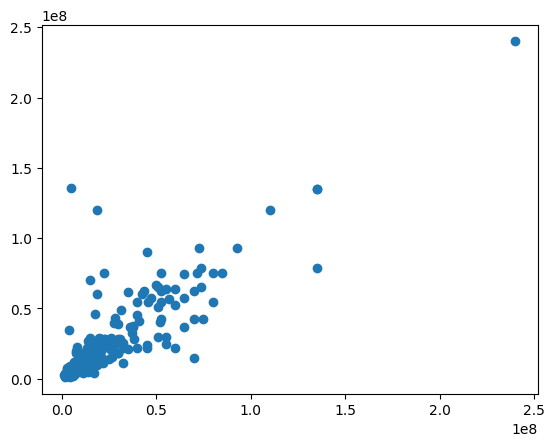

In [104]:
plt.scatter(Y_test,predictions)

In [80]:
from sklearn.metrics import r2_score

In [81]:
r2_score(Y_test,predictions)

0.6769156214844411